In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
import os


In [3]:
df = pd.read_csv('train.tsv', sep='\t')
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [1]:
train, test = train_test_split(df, test_size=0.2)
print(train.shape, test.shape)

NameError: name 'train_test_split' is not defined

There are around 1.18 million data points/rows in the train data and 0.296 million data points/rows in the test data. 8 is the number of columns/features in both the sets. 

In [5]:
#this command displays first few rows of the data set
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
579597,579597,NEW Eyeko Eye Do Black Liquid Eyeliner,1,Beauty/Makeup/Eyes,Sephora,11.0,1,"Free shipping! Brand new in box, authentic Eye..."
240604,240604,Butter Slime CLAY,1,Kids/Toys/Arts & Crafts,NaN,10.0,1,Choose a COLOR Yellow White Brown This is ONLY...
521964,521964,Floral Bronze Home Decor Wall Art Quote,1,Home/Home Décor/Home Décor Accents,Bath & Body Works,10.0,0,"Wall art for your home with a sweet quote. ""Li..."
1285339,1285339,Lularoe Mimi,1,Women/Sweaters/Poncho,Independent,76.0,1,Navy with cream/tan Mimi. BNWT. It will look a...
168601,168601,Nike Baseball Cap NC Tar Heels,2,Men/Men's Accessories/Hats,Nike,16.0,0,Light blue


# Check for missing values

In [6]:
df.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [7]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

There are 3 columns that have missing values
#The ‘brand_name’ feature has 42% missing values.

# EDA

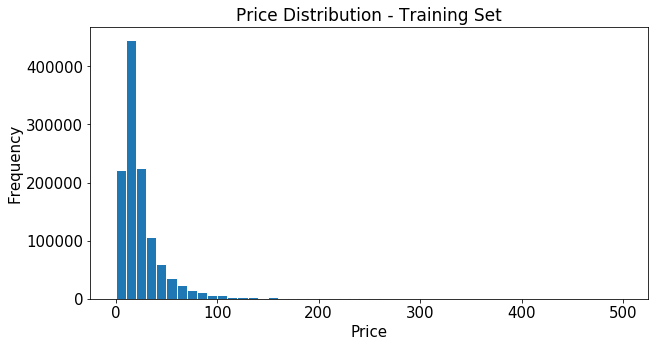

In [8]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,500])
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)
plt.show()

In [9]:
train['price'].describe()

count    1.186028e+06
mean     2.673888e+01
std      3.845178e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

The distribution of the Price variable aligns with the above statistics, i.e. the distribution is right skewed.
The median price of the items is $17.
75% of the items have price below $29.
The maximum price of an item from the data is $2009.

#shipping-fee

In [10]:
train['shipping'].value_counts(normalize=True)*100


0    55.280904
1    44.719096
Name: shipping, dtype: float64

The shipping fee for 55.26% of the items are paid by the buyers.

C:\Users\S.Sowndarya sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\S.Sowndarya sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


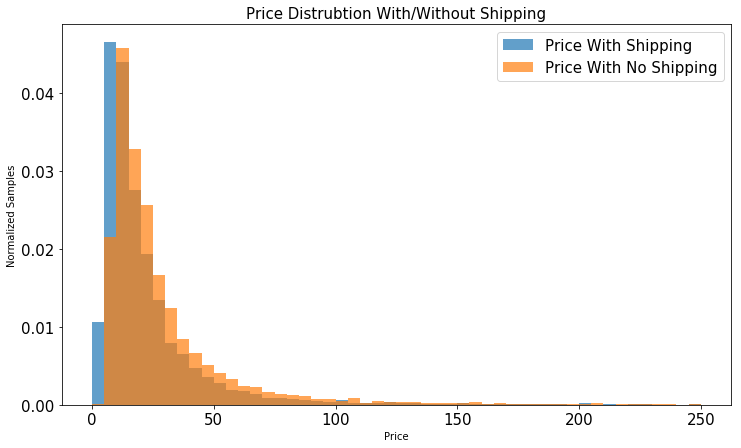

In [11]:
shipping = train[train['shipping']==1]['price']
no_shipping = train[train['shipping']==0]['price']

plt.figure(figsize=(12,7))
plt.hist(shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, normed=True, range=[0,250], alpha=0.7, label='Price With No Shipping')
plt.title('Price Distrubtion With/Without Shipping', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

The median price of the products is $14.0 if seller pays for the shipping while the median price of the products is $20.0 if buyer pays for the shipping.

Normally when we buy products online, we need to pay for shipping or delivery of products which are below a certain price. 
But here the trend is kind of opposite since the median price of items for which the seller pays the shipping fees is lower than the median price of the items for which the buyer pays the shipping fees.

Item Condition

In [12]:
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.207749
2    25.337260
3    29.138098
4     2.156273
5     0.160620
Name: item_condition_id, dtype: float64

43% of the items have item condition ID as 1 while only 0.16% of the items have item condition ID has 5

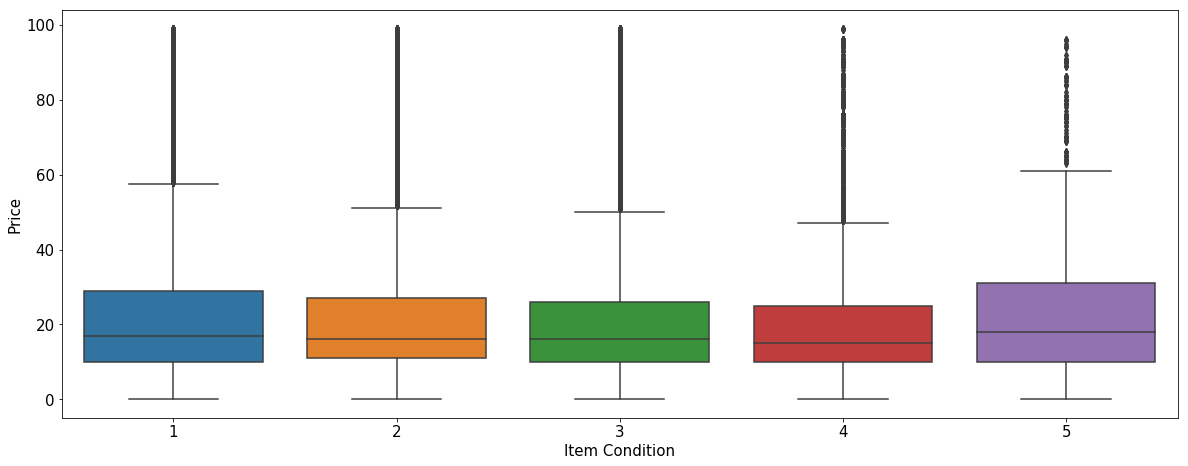

In [13]:
#for easier visualization, we are considering the prices from range of 0-100
price_100 = train[train['price']<100]
fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Item Condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Though the proportion is low, items with item condition ID as 5 have higher median price when compared with items having better condition.
After going through some of the data in which the item condition ID is given as 5, most of the products with this condition, especially electronic products are being sold for their parts which itself can prove to be valuable. This pretty much explains the higher median price.

In [14]:
#Brand Analysis

In [15]:
# Amount of unique brand names
train['brand_name'].nunique()

4538

There are 4528 unique brands in the data. Let’s take a look at the top 20 most popular brands.

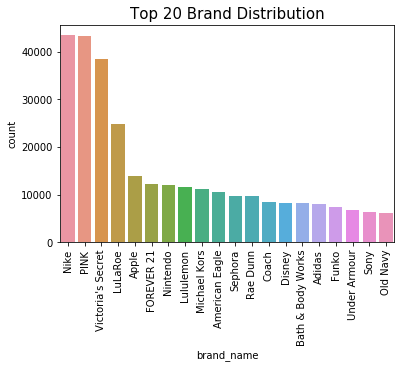

In [16]:
# Top 20 Brand Distribution
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

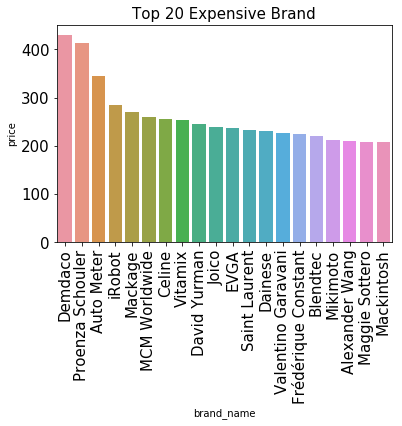

Nike                                 0.063904
PINK                                 0.063748
Victoria's Secret                    0.056519
LuLaRoe                              0.036441
Apple                                0.020394
FOREVER 21                           0.017893
Nintendo                             0.017654
Lululemon                            0.017068
Michael Kors                         0.016368
American Eagle                       0.015581
Sephora                              0.014404
Rae Dunn                             0.014348
Coach                                0.012401
Disney                               0.012229
Bath & Body Works                    0.012188
Adidas                               0.011948
Funko                                0.010860
Under Armour                         0.009946
Sony                                 0.009356
Old Navy                             0.008965
Hollister                            0.008185
Carter's                          

In [17]:
# Display Top 20 Expensive Brands By Mean Price
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

we can say that the brand pink has got the highest average price of all products.

Category of the Product

Interesting findings:

Women and Beauty take up majority of the distribution
Women and Beauty take up 56% of the distribution
Questions to ask:

Can we create a gender category (Female, Male, Nuetral). Example: Three categories means three gender types. If two of them are female, then we classify as a female purchaser. If two of them are male, then we classify as male. If male/female/neutral then?
Does gender play a role in price?
Can we create an age category?

In [18]:
(train['category_name'].value_counts(normalize=True)*100).head(6)

Women/Athletic Apparel/Pants, Tights, Leggings    4.089210
Women/Tops & Blouses/T-Shirts                     3.149656
Beauty/Makeup/Face                                2.325514
Beauty/Makeup/Lips                                2.026442
Electronics/Video Games & Consoles/Games          1.798667
Beauty/Makeup/Eyes                                1.709758
Name: category_name, dtype: float64

After splitting the categories, we have 11 unique main categories, 114 unique first sub-categories, 863 unique second sub-categories.While splitting, the missing values will be filled with the string ‘Category Unknown’.

In [ ]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()

C:\Users\S.Sowndarya sri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category_main,category_sub1,category_sub2,price
579597,Beauty,Makeup,Eyes,11.0
240604,Kids,Toys,Arts & Crafts,10.0
521964,Home,Home Décor,Home Décor Accents,10.0
1285339,Women,Sweaters,Poncho,76.0
168601,Men,Men's Accessories,Hats,16.0


In [ ]:
# Display distribution
train['category_main'].value_counts(1)

Women                     0.451691
Beauty                    0.141274
Kids                      0.116621
Electronics               0.081162
Men                       0.063277
Home                      0.046116
Vintage & Collectibles    0.031719
Other                     0.030830
Handmade                  0.020786
Sports & Outdoors         0.016523
Name: category_main, dtype: float64

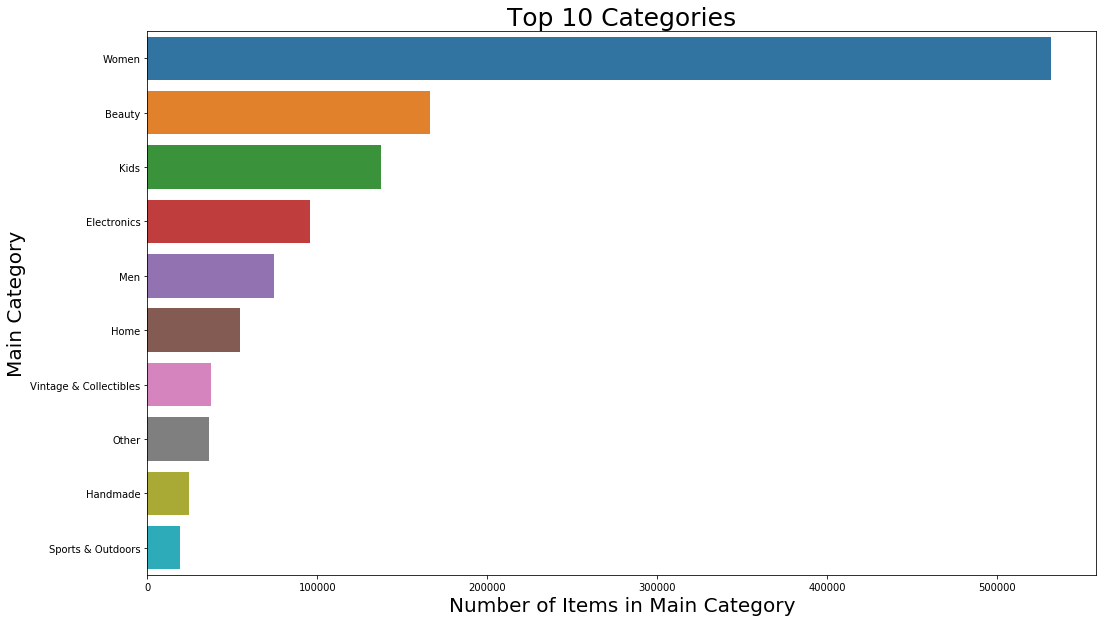

In [ ]:
plt.figure(figsize=(17,10))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()


The maximum number of products, i.e. 44.8% of the total products belong to ‘Women’ category followed by ‘Beauty’ category products which takes up around 14% of the total products while 1.7% of the products, being the minimum, belong to the ‘Sports and Outdoor’ category.

In [ ]:
#category 1 distribution

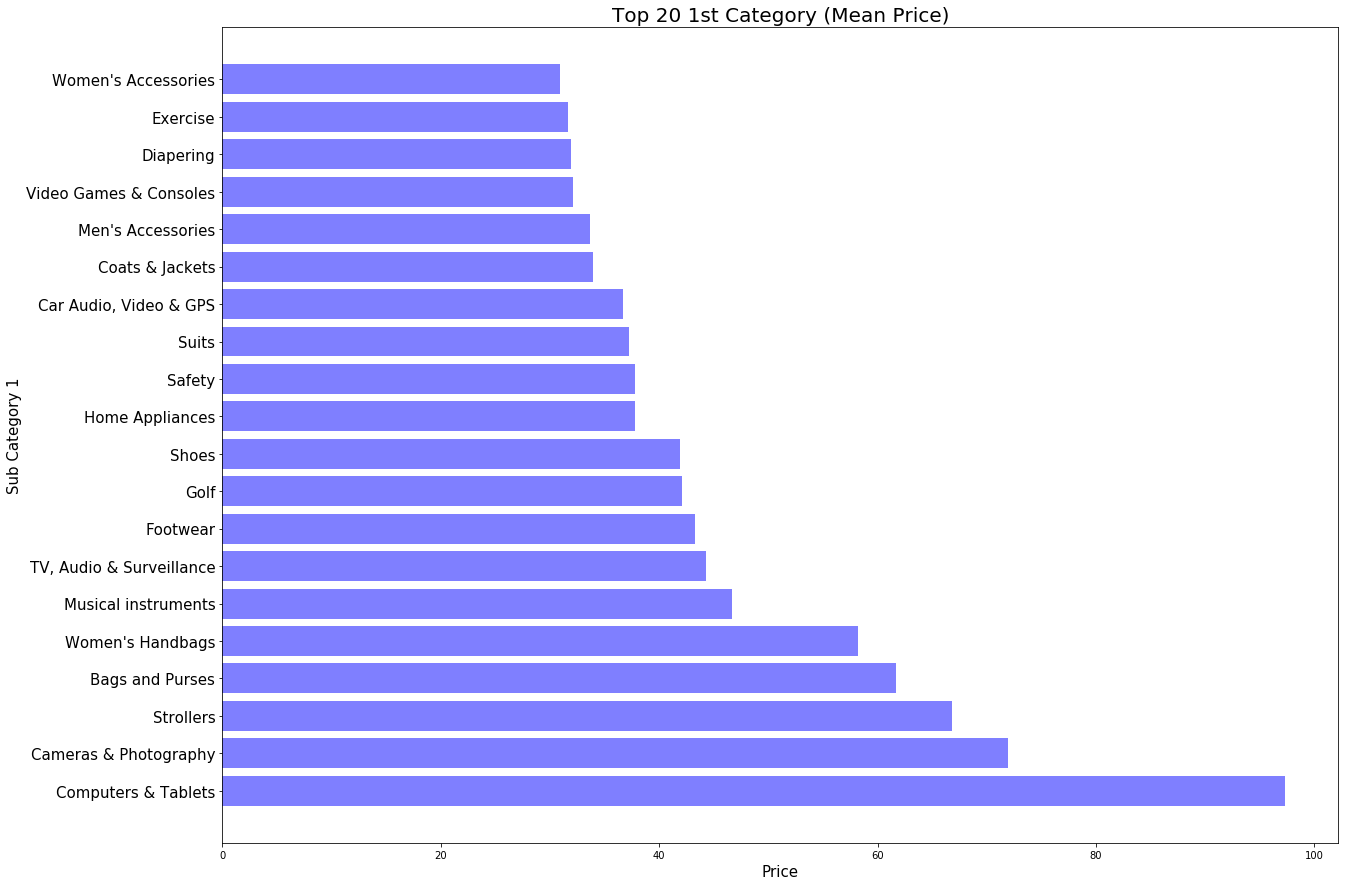

In [ ]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()


From the perspective of the median price of the items, the items from the subcategory of ‘Computers & Tablets’ have the highest median price, with the median price being $40.

In [ ]:
#category 2 

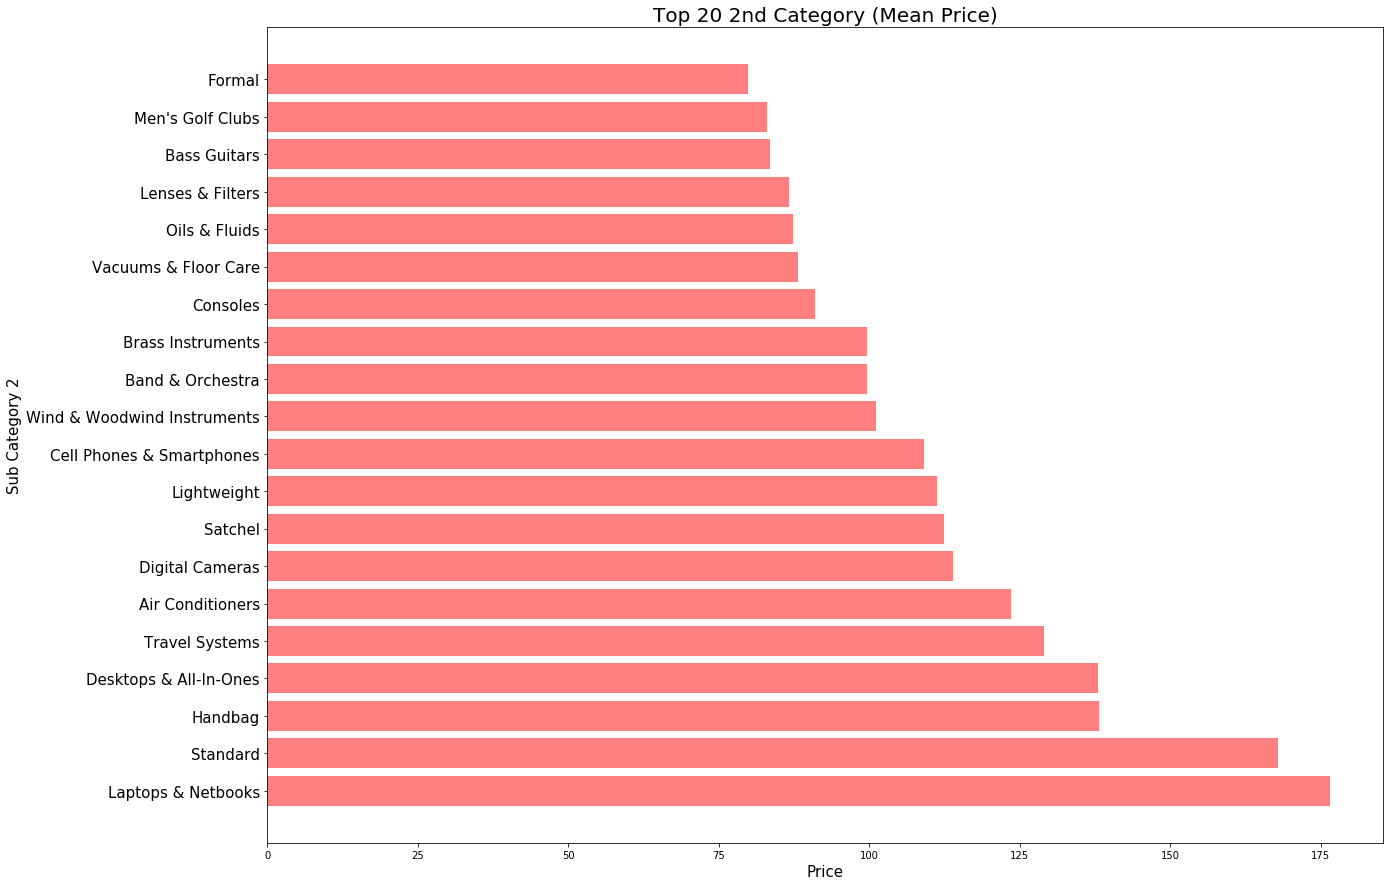

In [ ]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()


In [ ]:
#building a baseline 

In [ ]:
#split the target variable and the predictor variables
x_train, x_test = train.drop(['price'], axis=1), test.drop(['price'], axis=1)
y_train, y_test = train['price'], test['price']
#log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
#for baseline prediction
y_train_mean = y_train_log.mean()
from sklearn.metrics import mean_squared_error
def rmsle(y_test, y_pred):  
    result = (np.sqrt(((y_test-y_pred)**2).mean())).round(4)
    return result
  
baseline_result = rmsle(y_test_log,y_train_mean)
print(baseline_result)
0.7497

0.7494


0.7497

In order for us to say that the machine learning algorithm has performed well, the error obtained from the ML model should be less than the baseline error i.e. 0.7497.

# model selection

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
# Create the model to use for hyperparameter tuning
DT = DecisionTreeRegressor(random_state=42)
# Minimum number of samples to split a node
min_samples_split = [25,50,75,100,200]
# Maximum depth of each tree
max_depth = [5,10,20,30,50]
# Define the grid of hyperparameters to search
params = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
# Set up the random search with 4-fold cross validation
RS_DT = RandomizedSearchCV(DT, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
# Fit on the training data
RS_DT.fit(x_train, y_train_log)
# this will return the hyperparameters with lowest CV error
RS_DT.best_params_

In [ ]:
# Create the model with the optimal hyperparameters
DT = DecisionTreeRegressor(max_depth=30, min_samples_split=50, random_state=42)
# Fit the model on the training data
DT.fit(x_train_final, y_train_log)
# Make predictions on the test data
y_pred_dt = DT.predict(x_test_final)
# Evaluate the model
dt_error = rmsle(y_test_log, y_pred_dt)
print(dt_error)